#                Netflix 

   ###  Nextflix dataset has informed TV shows and Movies available on netflix

  


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# import data 
net = pd.read_csv('C:/DATASETS/Dataset/Netflix2.csv')

In [3]:
# Read the data
net.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# show the data type of the each column
net.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [5]:
# shape of dataset
net.shape

(7789, 11)

In [6]:
# find the missing values
net.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot: >

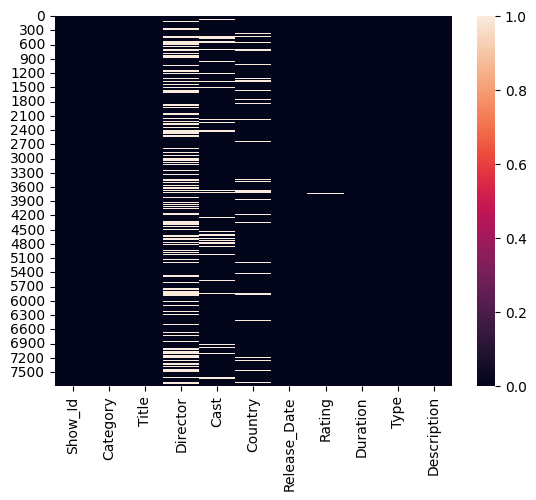

In [7]:
# show the missing vales 
sns.heatmap(net.isnull())

In [8]:
# find the duplicates
net.duplicated().sum()

2

In [9]:
# locate the duplicates
net[net.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,5-Apr-19,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,4-Sep-20,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [10]:
# remove the duplicates in dataset
net.drop_duplicates(inplace=True)
# check the duplicates
net.duplicated().sum()

0

In [11]:
# which year hightest number of TV Shows and Movies are released.
net.dtypes
net['N_relese_date'] = pd.to_datetime(net['Release_Date']) # add the new column with changing the data type
net.head(3)
net['N_relese_date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: N_relese_date, dtype: int64

(10.0, 2300.0)

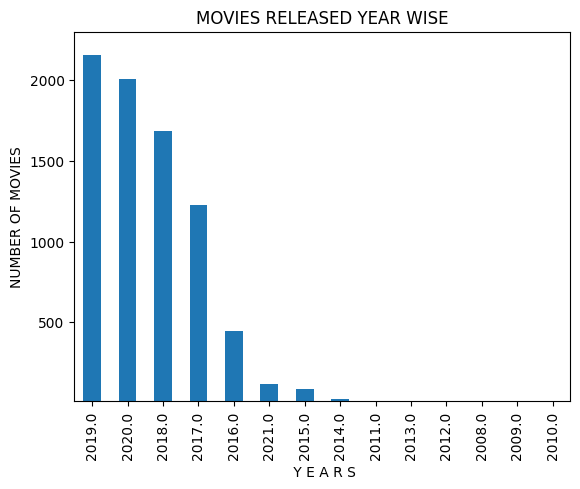

In [12]:
net['N_relese_date'].dt.year.value_counts().plot(kind='bar')
plt.title('MOVIES RELEASED YEAR WISE')
plt.xlabel(' Y E A R S')
plt.ylabel('NUMBER OF MOVIES')
plt.ylim(10,2300)

In [13]:
# How many TV Shows and Movies are in dataset.
net.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

Text(0.5, 0, 'C A T E G O R Y')

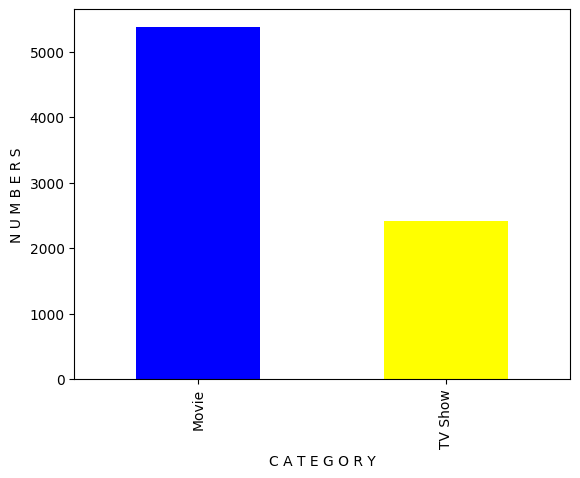

In [14]:
net.groupby('Category').Category.count().plot(kind='bar',color = ['blue', 'yellow'])
plt.ylabel('N U M B E R S')
plt.xlabel('C A T E G O R Y')
#plt.legend(['MOVIES', 'TV SHOWS'])

In [15]:
# For 'house of cards', what is the id, who is the director of this show
net[net['Title'].isin(['House of Cards'])]
#net[net['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2-Nov-18,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2018-11-02


In [16]:
# How all the movies where released in year 2000.
net['year'] = net['N_relese_date'].dt.year
net.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0


In [17]:
# filitering
net[(net['Category'] == 'Movie') & (net['year'] == 2000)]
# No movies are released 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year


In [18]:
# show only TV Shows that were released in inida.
net[(net['Category'] == 'TV Show') & (net['Country'] == 'India')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,1-Dec-18,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",2018-12-01,2018.0
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,30-Jul-19,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019-07-30,2019.0
340,s341,TV Show,Agent Raghav,NaN,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,15-Apr-17,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl...",2017-04-15,2017.0
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,31-Mar-20,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",2020-03-31,2020.0
533,s534,TV Show,Anjaan: Rural Myths,NaN,NaN,India,15-Dec-18,TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...,2018-12-15,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,s6249,TV Show,The Creative Indians,NaN,NaN,India,24-Aug-20,TV-MA,2 Seasons,"Docuseries, International TV Shows",From chefs and comedians to filmmakers and fas...,2020-08-24,2020.0
6400,s6399,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,1-Jun-17,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",2017-06-01,2017.0
6469,s6468,TV Show,The House That Made Me,NaN,Vinay Pathak,India,31-Mar-17,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",2017-03-31,2017.0
7294,s7293,TV Show,Typewriter,NaN,"Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...",India,19-Jul-19,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries",Three young friends in Goa plan to search an o...,2019-07-19,2019.0


In [19]:
# show the top 10 directors who give the hight number of tv shows and movies to nerflix.
net['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [20]:
# In how many movies and tv shows tom cruise was cast.
net[net['Cast'] == 'Tom Cruise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year


In [21]:
# show thw all records, where category os movie, type is Comidean, where counnrty is the united states.
net.head(5)
net[(net['Category'] == 'Movie') & (net['Type'] == 'Comedies') | (net['Country'] == 'United States')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1-Nov-19,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,20-Oct-17,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017-10-20,2017.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,19-Mar-20,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,1-Oct-18,R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...,2018-10-01,2018.0
7773,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,10-Aug-18,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...,2018-08-10,2018.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019.0


In [22]:
# Creating the new data frame
net_1=net.dropna()
net_1.head(3)
net_1.shape
net_1[net_1['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,1-Jan-20,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1-Jul-19,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


In [23]:
# what the different type of ratings provided by the netflix.
net.Rating.nunique()

14

In [24]:
net['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [25]:
# How many movies got the TV-14 rating in canda
net[(net['Category'] == 'Movie') & (net['Rating'] == 'TV-14') & (net['Country'] == 'Canada')]
#net[(net['Category'] == 'Movie') & (net['Rating'] == 'TV-14') & (net['Country'] == 'Canada')].shape

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,5-Feb-20,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,10-Apr-19,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,27-Dec-18,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,1-Jul-18,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,12-Nov-17,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,14-Oct-19,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,22-Aug-17,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,2017.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,1-Dec-17,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,2017.0
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,NaN,Canada,1-Jul-19,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,2019.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,18-Jun-19,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,2019.0


In [26]:
# how many TV Shows get the R rating after the 2018
net[(net['Category'] == 'TV Show') & (net['Rating'] == 'R') & (net['year'] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,25-Apr-19,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


In [27]:
# what is the max duration of movie ar tv show on Netflix
net.Duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [28]:
net.Duration.dtype

dtype('O')

In [29]:
net[['Minutes', 'units']] = net['Duration'].str.split(' ', expand = True)
# drop the Mintus column
net.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year,Minutes,units
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min


In [30]:
net.Minutes.max()

'99'

In [55]:
# which induvial country have the hight number of TV Shows.
net_tvshow = net[net['Category'] == 'TV Show']
net_tvshow.head(6)
net_tvshow.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [41]:
# sort the data by year
net.sort_values(by='year').head(2)
net.sort_values(by='year',ascending=False).head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year,Minutes,units
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia",1-Jan-21,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,1-Jan-21,PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min


In [44]:
# find the all instance where.
# category is movvie and content is drama
net[(net['Category'] == 'Movie') & (net['Type'] == 'Dramas')].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year,Minutes,units
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1-Nov-19,R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min


In [53]:
#category is TV shoe and type is Kid
net[(net['Category'] == 'TV Show') & (net['Type'] == "kids' TV")].head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,N_relese_date,year,Minutes,units
